# Проект: Исследование стартапов

## Введение

**Цель:**
Провести комплексный анализ данных о стартапах для выявления тенденций и факторов, влияющих на их успешность и финансирование.

**Задачи:**
1. Загрузить и предварительно обработать данные о стартапах, включая информацию о раундах финансирования, образовании сотрудников и других параметрах. 
2. Исследовать зависимости между размером компании и полнотой информации об образовании сотрудников.
3. Проанализировать тенденции в сфере финансирования стартапов, включая типичный размер средств, выделяемых в рамках одного раунда, и количество раундов финансирования.
4. Оценить влияние статуса стартапа на количество и размер раундов финансирования.
5. Выявить факторы, способствующие успеху или неудаче стартапов. 6. Разработать рекомендации для основателей стартапов по привлечению финансирования, управлению командой и развитию бизнеса.


**Данные:**
Для исследование стартапов. Данные состоят из семи датасетов:

**Таблица acquisition**
Содержит информацию о покупках одними компаниями других компаний:

id — идентификатор покупки.

acquiring_company_id — идентификатор покупающей компании.

acquired_company_id — идентификатор покупаемой компании.

term_code — варианты расчёта.

price_amount — сумма сделки.

acquired_at — дата сделки.

**Таблица company_and_rounds**
Содержит информацию о компаниях и раундах финансирования:

company ID — идентификатор компании.

name — название компании.

category code — категория области деятельности компании.

status — статус компании.

founded at — дата инвестирования.

closed at — дата закрытия компании.

domain — официальный сайт компании.

network username — ник компании в сети.

country code — код страны компании.

investment rounds — число инвестиционных раундов.

funding rounds — число раундов финансирования.

funding total — сумма финансирования.

milestones — вехи финансирования.

funding round id — идентификатор этапа финансирования.

company id — идентификатор компании.

funded at — дата финансирования.

funding round type — тип финансирования.

raised amount — сумма финансирования.

pre money valuation — предварительная денежная оценка.

participants — число участников.

is first round — является ли раунд первым.

is last round — является раунд последним.

**Таблица education**
Содержит информацию об образовании сотрудника:

id — идентификатор записи об образовании.

person_id — идентификатор работника.

instituition — название учебного заведения.

graduated_at — дата получения образования.

**Таблица people**
Содержит информацию о сотрудниках:

id — идентификатор сотрудника.

first_name — имя сотрудника.

last_name — фамилия сотрудника.

company_id — идентификатор компании.

network_username — ник в социальных сетях.

**Таблица degrees**
Содержит информацию о типе образования сотрудника:

id — идентификатор записи.

object_id — идентификатор сотрудника.

degree_type — тип образования.

subject — специальность.

**Таблица fund**
Содержит информацию о фондах:

id — идентификатор фонда.

name — название фонда.

category_code — категория области деятельности компании.

founded_at — дата создания фонда.

domain — сайт фонда.

network_username — ник фонда в сети.

country_code — код страны фонда.

investment_rounds — число инвестиционных раундов.

invested_companies — число профинансированных компаний.

milestones — вехи финансирования.

**Таблица investment**

Содержит информацию о раундах инвестирования:

id — идентификатор этапа инвестирования.

funding_round_id — идентификатор раунда инвестирования.

company_id — индентификатор компании.

funding_round_type — тип финансирования.

fund_id — идентификатор фонда.


## Шаг 1. Знакомство с данными: загрузка и первичная предобработка

Названия файлов:
* acquisition.csv
* company_and_rounds.csv
* people.csv
* education.csv
* degrees.csv

Опциональные датасеты:
* fund.csv
* investment.csv


Они находятся в папке datasets, если вы выполняете работу на платформе. В случае, если вы делаете работу локально, доступ к файлам в папке можно получить по адресу `https://code.s3.yandex.net/datasets/` + имя файла.

### 1.1. Вывод общей информации, исправление названия столбцов

- Загрузить все данные по проекту.
- Проверить названия столбцов.
- Вывести информацию, которая необходима вам для принятия решений о предобработке, для каждого из датасетов.

In [75]:
# Импортируем библиотеки
import pandas as pd
!pip install phik
import numpy as np
# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns



In [76]:
# Выгружаем данные в переменные acquisition_df, company_and_rounds_df, people_df, education_df, degrees_df, fund_df, investment_df
acquisition_df = pd.read_csv('https://code.s3.yandex.net/datasets/acquisition.csv')
company_and_rounds_df = pd.read_csv('https://code.s3.yandex.net/datasets/company_and_rounds.csv')
people_df = pd.read_csv('https://code.s3.yandex.net/datasets/people.csv')
education_df = pd.read_csv('https://code.s3.yandex.net/datasets/education.csv')
degrees_df = pd.read_csv('https://code.s3.yandex.net/datasets/degrees.csv')
fund_df = pd.read_csv('https://code.s3.yandex.net/datasets/fund.csv')
investment_df = pd.read_csv('https://code.s3.yandex.net/datasets/investment.csv')

Познакомимся с данными датасетов  — выведем первые строки методом head(), а информацию о датафрейме методом info():

In [3]:
acquisition_df.head()

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01


In [4]:
acquisition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


Датасет acquisition.csv содержит 6 столбцов и 9407 строк.

После первичного анализа данных можно сделать следующие выводы:
- Названия столбцов в нужном регистре.
- acquired_at приаести к типу date.
- Пропуски содержатся в acquired_at и term_code.



In [5]:
company_and_rounds_df.head()

,company ID,name,category code,status,founded at,closed at,domain,network username,country code,investment rounds,...,milestones,funding round id,company id,funded at,funding round type,raised amount,pre money valuation,participants,is first round,is last round
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
company_and_rounds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company  ID            217472 non-null  float64
 1   name                   217472 non-null  object 
 2   category  code         143886 non-null  object 
 3   status                 217472 non-null  object 
 4   founded  at            109956 non-null  object 
 5   closed  at             3449 non-null    object 
 6   domain                 147159 non-null  object 
 7   network  username      95534 non-null   object 
 8   country  code          108607 non-null  object 
 9   investment  rounds     217472 non-null  float64
 10  funding  rounds        217472 non-null  float64
 11  funding  total         217472 non-null  float64
 12  milestones             217472 non-null  float64
 13  funding  round  id     52928 non-null   float64
 14  company  id            52928 non-nul

Датасет company_and_rounds.csv содержит 22 столбца и 217774 строк.

После первичного анализа данных можно сделать следующие выводы:
- Названия столбцов лучше привести к одному виду, например snake case.
- is  first  round и is  last  round приаести к типу bool.
- Пропуски содержатся везде.



In [7]:
people_df.head()

,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN


In [8]:
people_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226704 non-null  object 
 2   last_name         226708 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


Датасет people.csv содержит 5 столбцjd и 226709 строк.

После первичного анализа данных можно сделать следующие выводы:
- Названия столбцов лучше привести к одному виду, например snake case.
- Типы данных верны.
- Пропуски содержатся везде кроме: id


In [9]:
education_df.head()

,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN


In [10]:
education_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


Датасет education.csv содержит 4 столбца и 109610  строк.

После первичного анализа данных можно сделать следующие выводы:
- Названия столбцов в норме.
- Типы данных graduated_at заменить на datetime .
- Пропуски содержатся в instituition и graduated_at.



In [11]:
degrees_df.head()

,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


In [12]:
degrees_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98392 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


Датасет degrees.csv содержит 4 столбца и 109610 строк.

После первичного анализа данных можно сделать следующие выводы:
- Названия столбцов в норме.
- Типы данных в норме.
- Пропуски содержатся в degree_type и subject.



In [13]:
fund_df.head()

,id,name,founded_at,domain,network_username,country_code,investment_rounds,invested_companies,milestones
0,13131,NaN,NaN,NaN,NaN,NaN,0,0,0
1,1,Greylock Partners,1965-01-01,greylock.com,greylockvc,USA,307,196,0
2,10,Mission Ventures,1996-01-01,missionventures.com,NaN,USA,58,33,0
3,100,"Kapor Enterprises, Inc.",NaN,kei.com,NaN,USA,2,1,0
4,1000,Speed Ventures,NaN,NaN,NaN,NaN,0,0,1


In [14]:
fund_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11652 entries, 0 to 11651
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  11652 non-null  int64 
 1   name                11650 non-null  object
 2   founded_at          4605 non-null   object
 3   domain              7362 non-null   object
 4   network_username    2149 non-null   object
 5   country_code        7053 non-null   object
 6   investment_rounds   11652 non-null  int64 
 7   invested_companies  11652 non-null  int64 
 8   milestones          11652 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 819.4+ KB


Датасет fund.csv содержит 9 столбцов и 11652 строк.

После первичного анализа данных можно сделать следующие выводы:
- Названия столбцов лучше привести к одному виду, например snake case.
- Типы данных в норме.
- Пропуски содержатся в  name, founded_at, domain, network_username, country_code.



In [15]:
investment_df.head()

,id,funding_round_id,company_id,fund_id
0,1,1,4,1
1,2,1,4,2
2,3,3,5,4
3,4,4,5,1
4,5,4,5,5


In [16]:
investment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61403 entries, 0 to 61402
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   id                61403 non-null  int64
 1   funding_round_id  61403 non-null  int64
 2   company_id        61403 non-null  int64
 3   fund_id           61403 non-null  int64
dtypes: int64(4)
memory usage: 1.9 MB


Датасет investment.csv содержит 4 столбца и 61403 строк.

После первичного анализа данных можно сделать следующие выводы:
- Названия столбцов в норме.
- Типы данных в норме.
- Пропусков нет.



Данные содержат пропуски, но в целом их достаточно.

### 1.2. Смена типов и анализ пропусков

- Обработайтб типы данных в столбцах, которые хранят значения даты и времени, если это необходимо.
- Оценить полноту данных — сделайть предварительный вывод, достаточно ли данных для решения задач проекта.

In [17]:
# Выполним преобразование столбца 'acquisition_df'  к типу date
acquisition_df['acquired_at'] = pd.to_datetime(acquisition_df['acquired_at'])

In [18]:
# Выгрузим базовую информацию о датасете
acquisition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    9407 non-null   int64         
 1   acquiring_company_id  9407 non-null   int64         
 2   acquired_company_id   9407 non-null   int64         
 3   term_code             1831 non-null   object        
 4   price_amount          9407 non-null   int64         
 5   acquired_at           9378 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 441.1+ KB


In [19]:
# Выводим названия столбцов датафрейма company_and_rounds_df
company_and_rounds_df.columns

Index(['company  ID', 'name', 'category  code', 'status', 'founded  at',
       'closed  at', 'domain', 'network  username', 'country  code',
       'investment  rounds', 'funding  rounds', 'funding  total', 'milestones',
       'funding  round  id', 'company  id', 'funded  at',
       'funding  round  type', 'raised  amount', 'pre  money  valuation',
       'participants', 'is  first  round', 'is  last  round'],
      dtype='object')

In [20]:
# Передаём методу rename() словарь с названиями столбцов
company_and_rounds_df = company_and_rounds_df.rename(columns={'company  ID' : 'company.id', 
                                  'name': 'name', 
                                  'category  code': 'category_code', 
                                  'status' : 'status', 
                                  'founded  at' : 'founded_at',
                                  'closed  at' : 'closed_at', 
                                  'domain' : 'domain', 
                                  'network  username' : 'network_user_name',
                                  'country  code' : 'country_code',
                                  'investment  rounds' : 'investment_rounds', 
                                  'funding  rounds' : 'funding_rounds', 
                                  'funding  total': 'funding_total', 
                                  'milestones' : 'milestones',
                                  'funding  round  id' : 'funding_round_id', 
                                  'company  id' : 'company_id',
                                  'funded  at' : 'funded_at',
                                  'funding  round  type' : 'funding_round_type', 
                                  'raised  amount' : 'raised_amount',
                                  'pre  money  valuation' : 'pre_money_valuation ',
                                  'participants' : 'participants', 
                                  'is  first  round' : 'is_first_round',
                                  'is  last  round' : 'is_last_round'})

In [21]:
# Выведим преобразованные названия
company_and_rounds_df.columns

Index(['company.id', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_user_name', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'company_id', 'funded_at', 'funding_round_type',
       'raised_amount', 'pre_money_valuation ', 'participants',
       'is_first_round', 'is_last_round'],
      dtype='object')

In [22]:
# Выполним преобразование столбца'is_first_round' и 'is_last_round' к типу bool и funded_at в datetime
company_and_rounds_df['is_first_round'] = company_and_rounds_df['is_first_round'].astype(bool)
company_and_rounds_df['is_last_round'] = company_and_rounds_df['is_last_round'].astype(bool)
company_and_rounds_df['funded_at'] = pd.to_datetime(company_and_rounds_df['funded_at'])



In [23]:
# Выгрузим новую информацию о датасете
company_and_rounds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   company.id            217472 non-null  float64       
 1   name                  217472 non-null  object        
 2   category_code         143886 non-null  object        
 3   status                217472 non-null  object        
 4   founded_at            109956 non-null  object        
 5   closed_at             3449 non-null    object        
 6   domain                147159 non-null  object        
 7   network_user_name     95534 non-null   object        
 8   country_code          108607 non-null  object        
 9   investment_rounds     217472 non-null  float64       
 10  funding_rounds        217472 non-null  float64       
 11  funding_total         217472 non-null  float64       
 12  milestones            217472 non-null  float64       
 13 

In [24]:
# Выводим названия столбцов датафрейма
people_df.columns

Index(['id', 'first_name', 'last_name', 'company_id', 'network_username'], dtype='object')

In [25]:
# Передаём методу rename() словарь с названиями столбцов
people_df = people_df.rename(columns={'id' : 'id',
                                      'first_name' : 'first_name',
                                      'last_name' : 'last_name',
                                      'company_id' : 'company_id',
                                      'network_username' : 'network_user_name'})

In [26]:
# Выводим новое названия столбцов датафрейма
people_df.columns

Index(['id', 'first_name', 'last_name', 'company_id', 'network_user_name'], dtype='object')

In [27]:
# Выполним преобразование столбца graduated_at в datetime
education_df['graduated_at'] = pd.to_datetime(education_df['graduated_at'])

In [28]:
# Выгрузим новую информацию о датасете
education_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            109610 non-null  int64         
 1   person_id     109610 non-null  int64         
 2   instituition  109555 non-null  object        
 3   graduated_at  58054 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.3+ MB


In [29]:
# Выводим названия столбцов датафрейма
fund_df.columns

Index(['id', 'name', 'founded_at', 'domain', 'network_username',
       'country_code', 'investment_rounds', 'invested_companies',
       'milestones'],
      dtype='object')

In [30]:
# Передаём методу rename() словарь с названиями столбцов
fund_df = fund_df.rename(columns={'id' : 'id',
                                  'name' : 'name', 
                                  'founded_at' : 'last_name',
                                  'domain' : 'domain', 
                                  'network_username' : 'network_user_name',
                                  'country_code' : 'country_code',
                                  'investment_rounds' : 'investment_rounds',
                                  'invested_companies' : 'invested_companies',
                                  'milestones' : 'milestones'})

In [31]:
# Выводим новое названия столбцов датафрейма
fund_df.columns

Index(['id', 'name', 'last_name', 'domain', 'network_user_name',
       'country_code', 'investment_rounds', 'invested_companies',
       'milestones'],
      dtype='object')

Привел в оптимальный вид датасеты, сделав названия столбцов коректными и подобрав нужные типы данных.

## Шаг 2. Предобработка данных, предварительное исследование


### 2.1. Раунды финансирования по годам

Необходимо выполнить без объединения и дополнительной предобработки на основе датасета `company_and_rounds.csv`.

- Составить сводную таблицу по годам, в которой на основании столбца `raised_amount` для каждого года указан:
    - типичный размер средств, выделяемый в рамках одного раунда;
    - общее количество раундов финансирования за этот год.
    
- Оставить в таблице информацию только для тех лет, для которых есть информация о более чем 50 раундах финансирования.
- На основе получившейся таблицы построить график, который будет отражать динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования.

На основе полученных данных ответить на вопросы:

- В каком году типичный размер собранных в рамках одного раунда средств был максимален?
- Какая тенденция по количеству раундов и выделяемых в рамках каждого раунда средств наблюдалась в 2013 году?

In [32]:
# Группируем данные по годам
grouped = company_and_rounds_df.groupby(company_and_rounds_df['funded_at'].dt.year)

# Создаем сводную таблицу
summary_table = grouped['raised_amount'].agg([('Типичный размер средств', 'median'),  # Среднее значение raised_amount за год
                                            ('Общее количество раундов', 'count')  # Количество раундов финансирования за год
                                             ])

# Выводим сводную таблицу
print(summary_table)

           Типичный размер средств  Общее количество раундов
funded_at                                                   
1960.0                         0.0                         9
1973.0                         0.0                         1
1974.0                         0.0                         2
1984.0                     41000.0                         3
1985.0                         0.0                         1
1987.0                   1250000.0                         2
1989.0                     15000.0                         1
1990.0                   1000000.0                         1
1992.0                   2000000.0                         1
1993.0                     62500.0                         2
1994.0                   6700000.0                         2
1995.0                   2000000.0                         7
1996.0                     12500.0                         7
1997.0                   3300000.0                         9
1998.0                  

In [33]:
# Фильтруем таблицу по условию
summary_table = summary_table[summary_table['Общее количество раундов'] > 50]

# Выводим сводную таблицу
print(summary_table)

           Типичный размер средств  Общее количество раундов
funded_at                                                   
1999.0                   2000000.0                        76
2000.0                   4200000.0                       125
2001.0                   3000000.0                        96
2002.0                   4200000.0                       116
2003.0                   3000000.0                       159
2004.0                   5000000.0                       291
2005.0                   5500000.0                      1633
2006.0                   5000000.0                      2436
2007.0                   3973320.0                      3279
2008.0                   3110000.0                      3774
2009.0                   2000000.0                      4151
2010.0                   1602500.0                      6221
2011.0                   1200000.0                      9204
2012.0                   1000000.0                      9970
2013.0                  

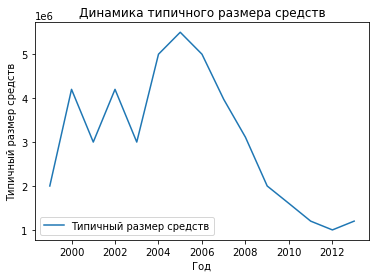

In [34]:
# Строим линейный график
summary_table.plot(
    kind='line',
    y='Типичный размер средств',
    title='Динамика типичного размера средств'
)

# Подписываем и отображаем график
plt.xlabel('Год')
plt.ylabel('Типичный размер средств')
plt.show() 

На основе полученных данных резюмируем:

- В 2000 размер собранных в рамках одного раунда средств был максимален.
- Тенденция увелечения по количеству раундов и выделяемых в рамках каждого раунда средств наблюдалась в 2013 году 


### 2.2. Люди и их образование

Нужно понять, зависит ли полнота сведений о сотрудниках (например, об их образовании) от размера компаний.

- Оценить, насколько информация об образовании сотрудников полна. Используя датасеты `people.csv` и `education.csv`, нужно разделить все компании на несколько групп по количеству сотрудников и оценить среднюю долю сотрудников без информации об образовании в каждой из групп.
- Оценить, возможно ли для выполнения задания присоединить к этим таблицам ещё и таблицу `degrees.csv`.

In [77]:
# Выполняем левое соединение по столбцу 'id'
#people_education_df = pd.merge(people_df, education_df, on='id', how='left')

# Выводим результат
#print(people_education_df)

 


In [36]:
# Объединяем данные об образовании для одного сотрудника
education_df_grouped = education_df.groupby('person_id').agg({
    'instituition': lambda x: ', '.join(str(y) for y in x if isinstance(y, str)),  # Объединяем названия учебных заведений в строку, игнорируя нечисловые значения
    'graduated_at': lambda x: ', '.join(map(str, x))  # Объединяем даты получения образования в строку
}).reset_index()


# Выполняем левое соединение по столбцу 'person_id'
people_education_df = pd.merge(people_df, education_df_grouped, left_on='id', right_on='person_id', how='left')

# Выводим результат
print(people_education_df)

 

            id  first_name    last_name  company_id network_user_name  \
0           10        Mark   Zuckerberg         5.0               NaN   
1          100       Peter       Lester        27.0               NaN   
2         1000  Dr. Steven  E. Saunders       292.0               NaN   
3        10000        Neil        Capel      2526.0               NaN   
4       100000         Sue       Pilsch         NaN               NaN   
...        ...         ...          ...         ...               ...   
226704   99999       Ramon      Peypoch         NaN               NaN   
226705  174088     Dr. Ray        Woods    188200.0           network   
226706  118386     Ricardo       Durand    143419.0    itechsocialnet   
226707  175827      mahesh        kumar         NaN     socialnethubs   
226708  178190        Alex        Smith         NaN    esocialnetlike   

        person_id                      instituition         graduated_at  
0            10.0                Harvard Univers

In [37]:
people_education_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226709 entries, 0 to 226708
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 226709 non-null  int64  
 1   first_name         226704 non-null  object 
 2   last_name          226708 non-null  object 
 3   company_id         34615 non-null   float64
 4   network_user_name  38867 non-null   object 
 5   person_id          68071 non-null   float64
 6   instituition       68071 non-null   object 
 7   graduated_at       68071 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 15.6+ MB


In [38]:
# Группируем данные по company_id и считаем количество сотрудников в каждой компании
grouped = people_education_df.groupby('company_id').size().reset_index(name='Количество сотрудников')

# Считаем долю сотрудников без информации об образовании в каждой компании
people_education_df['Отсутствие образования'] = people_education_df['instituition'].isna()
no_education_ratio = people_education_df.groupby('company_id')['Отсутствие образования'].mean().reset_index(name='Доля сотрудников без образования')

# Объединяем результаты
result_df = grouped.merge(no_education_ratio, on='company_id')

In [39]:
# Разделяем компании на группы по количеству сотрудников
bins = [0, 1, 2, 3, 5, 10, 25, float('inf')]
labels = ['1', '2', '3', '4-5', '6-10', '11-25', '26+']
result_df['Группа по количеству сотрудников'] = pd.cut(result_df['Количество сотрудников'], bins=bins, labels=labels)


# Выводим итоговую таблицу
result_df.head(10)

,company_id,Количество сотрудников,Доля сотрудников без образования,Группа по количеству сотрудников
0,1.0,2,0.500000,2
1,2.0,1,0.000000,1
2,3.0,3,0.333333,3
3,4.0,13,0.076923,11-25
4,5.0,61,0.262295,26+
5,8.0,3,1.000000,3
6,9.0,1,0.000000,1
7,10.0,2,0.500000,2
8,11.0,5,0.200000,4-5
9,12.0,51,0.490196,26+


In [40]:
merged_data = people_df.merge(education_df, how='left', left_on='id', right_on='person_id')


In [41]:
merged_data.head()

,id_x,first_name,last_name,company_id,network_user_name,id_y,person_id,instituition,graduated_at
0,10,Mark,Zuckerberg,5.0,NaN,2415.0,10.0,Harvard University,NaT
1,100,Peter,Lester,27.0,NaN,NaN,NaN,NaN,NaT
2,1000,Dr. Steven,E. Saunders,292.0,NaN,NaN,NaN,NaN,NaT
3,10000,Neil,Capel,2526.0,NaN,NaN,NaN,NaN,NaT
4,100000,Sue,Pilsch,NaN,NaN,NaN,NaN,NaN,NaT


In [42]:
# Подсчёт количества сотрудников в каждой компании
company_counts = merged_data.groupby('company_id').size().reset_index(name='employee_count')

# Определение групп по количеству сотрудников
bins = [0, 10, 50, float('inf')]
labels = ['1-10', '11-50', '51+']
company_groups = pd.cut(company_counts['employee_count'], bins=bins, labels=labels)
company_counts['group'] = company_groups

# Оценка доли сотрудников без информации об образовании
merged_data['has_education'] = ~merged_data['instituition'].isna()
no_education_count = merged_data.groupby(['company_id'])['has_education'].apply(lambda x: (~x).mean()).reset_index(name='no_education_share')

result = company_counts.merge(no_education_count, on='company_id')
result = result.groupby('group')['no_education_share'].mean()

print(result)

group
1-10     0.460619
11-50    0.297970
51+      0.183592
Name: no_education_share, dtype: float64


In [43]:
# Выполняем левое соединение по столбцу 'id'
people_education_2_df = pd.merge(people_education_df, degrees_df, on='id', how='left')

# Выводим результат
print(people_education_2_df)

people_education_2_df.head(10)

            id  first_name    last_name  company_id network_user_name  \
0           10        Mark   Zuckerberg         5.0               NaN   
1          100       Peter       Lester        27.0               NaN   
2         1000  Dr. Steven  E. Saunders       292.0               NaN   
3        10000        Neil        Capel      2526.0               NaN   
4       100000         Sue       Pilsch         NaN               NaN   
...        ...         ...          ...         ...               ...   
226704   99999       Ramon      Peypoch         NaN               NaN   
226705  174088     Dr. Ray        Woods    188200.0           network   
226706  118386     Ricardo       Durand    143419.0    itechsocialnet   
226707  175827      mahesh        kumar         NaN     socialnethubs   
226708  178190        Alex        Smith         NaN    esocialnetlike   

        person_id                      instituition         graduated_at  \
0            10.0                Harvard Univer

,id,first_name,last_name,company_id,network_user_name,person_id,instituition,graduated_at,Отсутствие образования,object_id,degree_type,subject
0,10,Mark,Zuckerberg,5.0,NaN,10.0,Harvard University,NaT,False,p:6265,BS,Economics
1,100,Peter,Lester,27.0,NaN,NaN,NaN,NaN,True,p:938,BS,Computer Science
2,1000,Dr. Steven,E. Saunders,292.0,NaN,NaN,NaN,NaN,True,p:13098,MBA,NaN
3,10000,Neil,Capel,2526.0,NaN,NaN,NaN,NaN,True,p:74038,MS,Applied Mathematics
4,100000,Sue,Pilsch,NaN,NaN,NaN,NaN,NaN,True,p:89666,MS,Computer Science
5,100002,Keith,Kurzendoerfer,NaN,NaN,NaN,NaN,NaN,True,p:257614,BS,Mechanical Engineering
6,100006,Courtney,Homer,81558.0,jobsbostontech,100006.0,MIT Sloan School of Management,2004-01-01 00:00:00,False,p:257617,BA,Political Science
7,100009,Eddy,Badrina,NaN,NaN,NaN,NaN,NaN,True,p:257619,MS,Economics
8,100010,Michael,Dadashyan,NaN,fbroulette,NaN,NaN,NaN,True,p:257626,NaN,Urban Studies
9,100011,Jeff,Grell,NaN,NaN,NaN,NaN,NaN,True,p:257626,NaN,Urban Planning


Информация о сторудниках в целом оптимальная, но ее можно и увеличить.
Да, присоединение таблицы degrees.csv к  текущим таблицам возможно и может быть полезным для более детального анализа образования сотрудников. Оценка доли сотрудников без информации об образовании показала:группа 1-10 -   0.460619,
группа 11-50  -  0.297970,
группа 51+     -  0.183592.

### 2.3. Объединять или не объединять — вот в чём вопрос

Некоторые названия столбцов встречаются в датасетах чаще других. В результате предварительной проверки датасетов было выяснено, что столбец `company_id` подходит для объединения данных.

- Установить, подходит ли для объединения данных столбец `network_username`, который встречается в нескольких датасетах. Нам необходимо понимать, дублируется ли для разных датасетов информация в столбцах с таким названием, и если да — то насколько часто.
- Оценить, можно ли использовать столбцы с именем `network_username` для объединения данных.

In [44]:
# Проверяем наличие дубликатов в столбце network_username в каждом датасете
duplicates_in_people = people_df['network_user_name'].duplicated().sum()
duplicates_in_company_and_rounds = company_and_rounds_df['network_user_name'].duplicated().sum()

print(f"Количество дубликатов в people: {duplicates_in_people}")
print(f"Количество дубликатов в company_and_rounds: {duplicates_in_company_and_rounds}")




Количество дубликатов в people: 188287
Количество дубликатов в company_and_rounds: 138202


In [45]:
# Сравниваем значения network_username между датасетами
common_usernames = set(people_df['network_user_name']).intersection(set(company_and_rounds_df['network_user_name']))

print(f"Общие значения network_username: {common_usernames}")

Общие значения network_username: {nan, 'agiletechnosys', 'saulosouto', 'treelifedesigns', 'leomancini', 'bouf', 'tribbldotcom', 'DaleyneGuay', 'mymzoneltd', 'alldealsoz', 'earbits', 'Safeguard', 'helponclick', 'randyhamilton', 'sunforged', 'AYININC', 'qliqsoft', 'homingcloud', 'litemediadesk', 'ali_presseract', 'unbridled_brain', 'epactnetwork', 'isai_fr', 'CreaBiomart', 'encoreseo', 'gutensite', 'criptero', '9lessons', 'toutsocial', 'specialkids', 'filmbudget', 'adsmoke1', 'endorphin_me', 'esioox', 'prisynccom', 'toddjpatrick', 'Lorenburnett', 'vasusrini', 'yokohamacanada', 'vdimauro', 'smartonlinepros', 'salon_zahra', 'njseos', 'davegovan', 'ssg_inc', 'switchcommerce', 'kortingshop', 'happytodos', 'dusten', 'vieditcom', 'cloudacl', 'RowNine', 'elastiv', 'Glydewrite', 'MyShoppingSpy', 'nddwseo', 'rbcarlisle', 'fundojob', 'Ideashower', 'Dibollandassoc', 'tampawebdesign', 'dreamingtech', 'harihansolution', 'Frozenbluemuss', 'RapidBoost', 'visio2france', 'leesfer', 'stage32online', 'visu

In [46]:
# Общее количество уникальных значений network_user_name
total_unique_usernames = len(set(people_df['network_user_name']) | set(company_and_rounds_df['network_user_name']))

# Количество общих значений network_username
common_usernames_count = len(common_usernames)

# Вычисляем процент пересечения
intersection_percentage = (common_usernames_count / total_unique_usernames) * 100

print(f"Процент пересечения: {intersection_percentage:.2f}%")


Процент пересечения: 1.90%


В датасетах часто встречаются повторяющиеся названия, и использование network_user_name (ника компании в сети) не всегда является хорошим способом для объединения данных (Процент пересечения к общему количеству: 1.90%).


### 2.4. Проблемный датасет и причина возникновения пропусков

Во время собственного анализа данных у заказчика больше всего вопросов возникло к датасету `company_and_rounds.csv`. В нём много пропусков как раз в информации о раундах, которая заказчику важна.

- Любым удобным способом превести данные в вид, который позволит в дальнейшем проводить анализ в разрезе отдельных компаний. Обратить внимание на структуру датасета, порядок и названия столбцов, проанализируйте значения.

По гипотезе заказчика данные по компаниям из этой таблицы раньше хранились иначе, более удобным для исследования образом.

- Максимальным образом сохраняя данные, сохранив их связность и исключив возможные возникающие при этом ошибки, нужно подготовить данные так, чтобы удобно было отобрать компании по параметрам и рассчитать показатели из расчёта на одну компанию без промежуточных агрегаций.

In [47]:
company_and_rounds_df.head()

,company.id,name,category_code,status,founded_at,closed_at,domain,network_user_name,country_code,investment_rounds,...,milestones,funding_round_id,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,False,True
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,False,False
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,True,False
3,10.0,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,...,0.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,True,True
4,100.0,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,...,4.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,True,True


In [48]:
company_and_rounds_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   company.id            217472 non-null  float64       
 1   name                  217472 non-null  object        
 2   category_code         143886 non-null  object        
 3   status                217472 non-null  object        
 4   founded_at            109956 non-null  object        
 5   closed_at             3449 non-null    object        
 6   domain                147159 non-null  object        
 7   network_user_name     95534 non-null   object        
 8   country_code          108607 non-null  object        
 9   investment_rounds     217472 non-null  float64       
 10  funding_rounds        217472 non-null  float64       
 11  funding_total         217472 non-null  float64       
 12  milestones            217472 non-null  float64       
 13 

In [49]:
# Проверяем полные дубликаты в датафрейме company_and_rounds_df
company_and_rounds_df.duplicated().sum()

0

In [50]:
# Проверяем неявные дубликаты в датафрейме company_and_rounds_df
company_and_rounds_df.duplicated(subset='company_id').sum()

185834

In [51]:
# Подсчитаем количество пропущенных значений в столбцах датафрейма
company_and_rounds_df.isna().sum()

company.id                 302
name                       302
category_code            73888
status                     302
founded_at              107818
closed_at               214325
domain                   70615
network_user_name       122240
country_code            109167
investment_rounds          302
funding_rounds             302
funding_total              302
milestones                 302
funding_round_id        164846
company_id              164846
funded_at               165094
funding_round_type      164846
raised_amount           164846
pre_money_valuation     164846
participants            164846
is_first_round               0
is_last_round                0
dtype: int64

In [52]:
# Выполним оценку на основании  соотношения
round((company_and_rounds_df.isna().sum() / company_and_rounds_df.shape[0]*100),2)

company.id               0.14
name                     0.14
category_code           33.93
status                   0.14
founded_at              49.51
closed_at               98.42
domain                  32.43
network_user_name       56.13
country_code            50.13
investment_rounds        0.14
funding_rounds           0.14
funding_total            0.14
milestones               0.14
funding_round_id        75.70
company_id              75.70
funded_at               75.81
funding_round_type      75.70
raised_amount           75.70
pre_money_valuation     75.70
participants            75.70
is_first_round           0.00
is_last_round            0.00
dtype: float64

In [53]:
company_and_rounds_df.columns

Index(['company.id', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_user_name', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'company_id', 'funded_at', 'funding_round_type',
       'raised_amount', 'pre_money_valuation ', 'participants',
       'is_first_round', 'is_last_round'],
      dtype='object')

In [54]:
print(company_and_rounds_df.columns)


Index(['company.id', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_user_name', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'company_id', 'funded_at', 'funding_round_type',
       'raised_amount', 'pre_money_valuation ', 'participants',
       'is_first_round', 'is_last_round'],
      dtype='object')


In [55]:
# Собираем информацию о компаниях
companies_df = company_and_rounds_df[['company.id', 'name', 'category_code', 'status', 'founded_at', 'closed_at', 'domain', 'network_user_name', 'country_code', 'investment_rounds', 'funding_rounds', 'funding_total', 'milestones']].drop_duplicates()

# Собираем информацию о раундах
rounds_df = company_and_rounds_df[['company_id', 'investment_rounds', 'funding_rounds', 'funding_total', 'milestones', 'funded_at', 'funding_round_type', 'raised_amount', 'pre_money_valuation ', 'participants', 'is_first_round', 'is_last_round']].drop_duplicates()


In [56]:
companies_df.head()


,company.id,name,category_code,status,founded_at,closed_at,domain,network_user_name,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0
3,10.0,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,0.0,0.0,0.0
4,100.0,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,0.0,0.0,4.0
5,10000.0,MYWEBBO,network_hosting,operating,2008-07-26,NaN,mywebbo.com,NaN,NaN,0.0,0.0,0.0,0.0
6,10001.0,THE Movie Streamer,games_video,operating,2008-07-26,NaN,themoviestreamer.com,NaN,NaN,0.0,0.0,0.0,0.0


In [57]:
companies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196554 entries, 0 to 217472
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   company.id         196553 non-null  float64
 1   name               196553 non-null  object 
 2   category_code      123186 non-null  object 
 3   status             196553 non-null  object 
 4   founded_at         91227 non-null   object 
 5   closed_at          2620 non-null    object 
 6   domain             126545 non-null  object 
 7   network_user_name  80591 non-null   object 
 8   country_code       87990 non-null   object 
 9   investment_rounds  196553 non-null  float64
 10  funding_rounds     196553 non-null  float64
 11  funding_total      196553 non-null  float64
 12  milestones         196553 non-null  float64
dtypes: float64(5), object(8)
memory usage: 21.0+ MB


In [58]:
rounds_df.head()

,company_id,investment_rounds,funding_rounds,funding_total,milestones,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round
0,1.0,0.0,3.0,39750000.0,5.0,2005-10-01,series-a,5250000.0,0.0,2.0,False,True
1,1.0,0.0,3.0,39750000.0,5.0,2007-01-01,series-b,9500000.0,0.0,3.0,False,False
2,1.0,0.0,3.0,39750000.0,5.0,2008-05-19,series-c+,25000000.0,0.0,4.0,True,False
3,NaN,0.0,0.0,0.0,0.0,NaT,NaN,NaN,NaN,NaN,True,True
4,NaN,0.0,0.0,0.0,4.0,NaT,NaN,NaN,NaN,NaN,True,True


In [59]:
rounds_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52943 entries, 0 to 217773
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   company_id            52852 non-null  float64       
 1   investment_rounds     52642 non-null  float64       
 2   funding_rounds        52642 non-null  float64       
 3   funding_total         52642 non-null  float64       
 4   milestones            52642 non-null  float64       
 5   funded_at             52606 non-null  datetime64[ns]
 6   funding_round_type    52852 non-null  object        
 7   raised_amount         52852 non-null  float64       
 8   pre_money_valuation   52852 non-null  float64       
 9   participants          52852 non-null  float64       
 10  is_first_round        52943 non-null  bool          
 11  is_last_round         52943 non-null  bool          
dtypes: bool(2), datetime64[ns](1), float64(8), object(1)
memory usage: 4.5+ M

Скорее всего company_rounds была получена в результате объединения двух меньших таблиц, поэтому было принято решение разбить ее на две companies_df  и rounds_df, где каждая строка это 1 компания, а столбцы содержат только нужныю информацию


## Шаг 3. Исследовательский анализ объединённых таблиц

> Приступите к шагу 3 после проверки ревьюера.

<big>Студентам нужно чётко сказать - проверять дальше или не проверять.</big>


### 3.1. Объединение данных

Объедините данные для ответа на вопросы заказчика, которые касаются интересующих его компаний. Заказчика прежде всего интересуют те компании, которые меняли или готовы менять владельцев. Получение инвестиций или финансирования, по мнению заказчика, означает интерес к покупке или продаже компании.

В качестве основы для объединённой таблицы возять данные из обработанного датасета `company_and_rounds.csv` — выбрать только те компании, у которых указаны значения `funding_rounds` или `investment_rounds` больше нуля, или те, у которых в колонке `status` указано `acquired`. В результирующей таблице должно получиться порядка 40 тысяч компаний.

Проверить полноту и корректность получившейся таблицы. Далее работать только с этими данными.

In [60]:
filtered_df = companies_df[(companies_df['funding_rounds'] > 0) | (companies_df['investment_rounds'] > 0) | (companies_df['status'] == 'acquired')]


In [61]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40747 entries, 0 to 217469
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   company.id         40747 non-null  float64
 1   name               40747 non-null  object 
 2   category_code      35315 non-null  object 
 3   status             40747 non-null  object 
 4   founded_at         27807 non-null  object 
 5   closed_at          2128 non-null   object 
 6   domain             35754 non-null  object 
 7   network_user_name  20850 non-null  object 
 8   country_code       34742 non-null  object 
 9   investment_rounds  40747 non-null  float64
 10  funding_rounds     40747 non-null  float64
 11  funding_total      40747 non-null  float64
 12  milestones         40747 non-null  float64
dtypes: float64(5), object(8)
memory usage: 4.4+ MB


Датасет с которым теперь предстоит работать filtered_df, в нем 40747 строк и 13 столбцов.


### 3.2. Анализ выбросов

Заказчика интересует обычный для рассматриваемого периода размер средств, который предоставлялся компаниям.

- По предобработанному столбцу `funding_total` графическим способом оценить, какой размер общего финансирования для одной компании будет типичным, а какой — выбивающимся.
- В процессе расчёта значений обратить внимание, например, на показатели, возвращаемые методом `.describe()`, — объясните их. Применимы ли к таким данным обычные способы нахождения типичных значений?

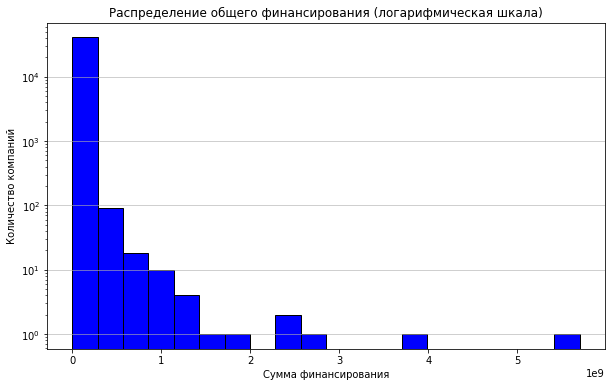

In [62]:
# Построение гистограммы с логарифмической шкалой
plt.figure(figsize=(10, 6))
plt.hist(filtered_df['funding_total'], bins=20, color='blue', edgecolor='black', log=True)
plt.title('Распределение общего финансирования (логарифмическая шкала)')
plt.xlabel('Сумма финансирования')
plt.ylabel('Количество компаний')
plt.grid(axis='y', alpha=0.75)



plt.show()

In [63]:
filtered_df.describe()

,company.id,investment_rounds,funding_rounds,funding_total,milestones
count,40747.000000,40747.000000,40747.000000,4.074700e+04,40747.000000
mean,110555.896140,0.150833,1.291531,1.013561e+07,0.803151
std,90388.070107,3.123291,1.264604,5.646436e+07,1.003431
min,1.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,33863.500000,0.000000,1.000000,0.000000e+00,0.000000
50%,69583.000000,0.000000,1.000000,6.000000e+05,1.000000
75%,184744.500000,0.000000,2.000000,5.650650e+06,1.000000
max,286215.000000,478.000000,15.000000,5.700000e+09,9.000000


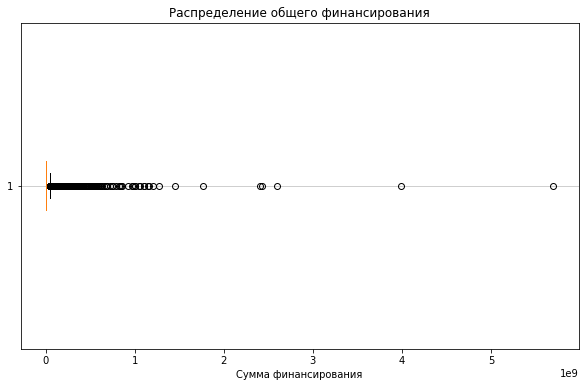

In [64]:
plt.figure(figsize=(10, 6))
plt.boxplot(filtered_df['funding_total'], vert=False, whis=[5, 95])
plt.title('Распределение общего финансирования')
plt.xlabel('Сумма финансирования')
plt.grid(axis='y', alpha=0.75)
plt.show()

Обычные способы нахождения типичных значений (среднее, медиана) могут быть применимы, но нужно учитывать распределение данных. Судя по высоким значениям стандартного отклонения и большой разнице между средним и медианой в некоторых столбцах, данные могут быть сильно искажены выбросами. В таких случаях медиана и процентили могут быть более информативными показателями типичности, чем среднее значение.


### 3.3. Куплены забесплатно?

- Исследовать компании, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования.

- Рассчитайть аналитически верхнюю и нижнюю границу выбросов для столбца `funding_total` и укажите, каким процентилям границы соответствуют.

In [65]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40747 entries, 0 to 217469
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   company.id         40747 non-null  float64
 1   name               40747 non-null  object 
 2   category_code      35315 non-null  object 
 3   status             40747 non-null  object 
 4   founded_at         27807 non-null  object 
 5   closed_at          2128 non-null   object 
 6   domain             35754 non-null  object 
 7   network_user_name  20850 non-null  object 
 8   country_code       34742 non-null  object 
 9   investment_rounds  40747 non-null  float64
 10  funding_rounds     40747 non-null  float64
 11  funding_total      40747 non-null  float64
 12  milestones         40747 non-null  float64
dtypes: float64(5), object(8)
memory usage: 4.4+ MB


In [66]:
#Выведем таблицу acquisition.
acquisition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    9407 non-null   int64         
 1   acquiring_company_id  9407 non-null   int64         
 2   acquired_company_id   9407 non-null   int64         
 3   term_code             1831 non-null   object        
 4   price_amount          9407 non-null   int64         
 5   acquired_at           9378 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 441.1+ KB


In [67]:
#Фильтруем компании, где цена составляла 1 доллар или меньше
zero_dollar_companies = acquisition_df[acquisition_df['price_amount'] <=1]
#Фильтруем компании, где  был ненулевой общий объём финансирования.
filtered_df_not_null = filtered_df[(filtered_df['funding_total'] != 0)]
zero_dollar_filtered_df = pd.merge(zero_dollar_companies, filtered_df_not_null, left_on = 'acquired_company_id', right_on = 'company.id')
zero_dollar_filtered_df

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at,company.id,name,category_code,status,founded_at,closed_at,domain,network_user_name,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,14,318,314,cash,0,2006-10-01,314.0,Reddit,web,acquired,2005-01-01,NaN,reddit.com,reddit,USA,0.0,1.0,100000.0,3.0
1,65,146,698,cash,0,2007-08-01,698.0,Maya's Mom,web,acquired,NaN,NaN,mayasmom.com,NaN,USA,0.0,1.0,1000000.0,2.0
2,67,156,718,cash,0,2007-08-01,718.0,Glimpse,ecommerce,acquired,NaN,NaN,glimpse.com,NaN,USA,0.0,1.0,4000000.0,0.0
3,87,1035,175,cash,0,2007-10-01,175.0,Newsvine,web,acquired,2005-03-31,NaN,newsvine.com,NaN,USA,0.0,1.0,1250000.0,0.0
4,115,396,1582,cash,0,2007-12-01,1582.0,BeliefNet,web,acquired,2008-01-01,NaN,beliefnet.com,eliefnet,USA,0.0,1.0,7000000.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1613,10481,29,165128,NaN,0,2013-12-06,165128.0,EvntLive,music,acquired,NaN,NaN,evntliveinc.com,EVNTLIVE,USA,0.0,1.0,2300000.0,2.0
1614,10500,42365,79582,NaN,0,2013-12-10,79582.0,lucierna,software,acquired,2009-05-22,NaN,lucierna.com,lucierna_inc,ESP,0.0,1.0,2106600.0,0.0
1615,10503,1434,60436,NaN,0,2013-12-10,60436.0,Cloudmeter,enterprise,acquired,2007-04-01,NaN,cloudmeter.com,cloudmeter,USA,0.0,1.0,5000000.0,2.0
1616,10507,29,169154,NaN,0,2013-12-09,169154.0,Quik.io,software,acquired,2011-02-03,NaN,quik.io,quik_io,USA,0.0,2.0,1280000.0,2.0


In [68]:
# Расчет границ выбросов
Q1 = zero_dollar_filtered_df['funding_total'].quantile(0.25)
Q3 = zero_dollar_filtered_df['funding_total'].quantile(0.75)
IQR = Q3 - Q1

# Определяем пороги выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Находим верхний ус (максимальное значение в пределах верхней границы)
# Используем max() с проверкой на непустоту
if not zero_dollar_filtered_df[
    (zero_dollar_filtered_df['funding_total'] <= upper_bound)
].empty:
    upper_whisker = zero_dollar_filtered_df[
        zero_dollar_filtered_df['funding_total'] <= upper_bound
    ]['funding_total'].max()
else:
    upper_whisker = None

# Находим нижний ус (минимальное значение в пределах нижней границы)
# Учитывая, что нижняя граница отрицательная, берем минимум из положительных значений
if not zero_dollar_filtered_df[
    (zero_dollar_filtered_df['funding_total'] >= lower_bound)
].empty:
    lower_whisker = zero_dollar_filtered_df[
        zero_dollar_filtered_df['funding_total'] >= lower_bound
    ]['funding_total'].min()
else:
    lower_whisker = zero_dollar_filtered_df['funding_total'].min()

print(f"Верхний ус: {upper_whisker}")
print(f"Нижний ус: {lower_whisker}")
print(f"25-й процентиль: {Q1}")
print(f"75-й процентиль: {Q3}")
print(f"Нижняя граница: {lower_bound}")
print(f"Верхняя граница: {upper_bound}")

Верхний ус: 35150000.0
Нижний ус: 3750.0
25-й процентиль: 2000000.0
75-й процентиль: 15500000.0
Нижняя граница: -18250000.0
Верхняя граница: 35750000.0


Нижняя граница в размере -18 250 000 является результатом математического расчёта и не имеет практического значения по следующим причинам: 
- Сумма финансирования не может быть отрицательной. 
- Показатель funding_total отражает реальные денежные вложения.

Пояснения к расчёту: Нижняя граница рассчитывается по формуле: Q1 - 1.5 * IQR. 
В данном случае Q1 (25-й процентиль) равен 2 000 000, а IQR (межквартильный размах) — 13 500 000. При таких значениях получается отрицательное число, что не имеет смысла в контексте реальных финансовых данных.



### 3.4. Цены стартапов по категориям

Категории стартапов с типично высокими ценами покупки стартапов и значительным разбросом цен могут быть привлекательными для крупных инвесторов, которые готовы к высоким рискам ради потенциально больших доходов. Среди категорий стартапов выделите категории стартапов, характеризующиеся:

- типично высокими ценами;
- и наибольшим разбросом цен за стартап.

Объяснить, почему решили составить топ именно из такого числа категорий и почему рассчитывали именно так.

In [69]:
startups_df = pd.merge(acquisition_df, filtered_df, left_on = 'acquired_company_id', right_on = 'company.id')

In [70]:
category_metrics = startups_df.groupby('category_code', observed=True).agg({
    'price_amount': ['mean', 'std', 'min', 'max']})
category_metrics

price_amount                                        
                          mean           std        min            max
category_code                                                         
advertising       6.946589e+07  2.799226e+08          0     3100000000
analytics         1.357500e+07  5.267164e+07          0      263000000
automotive        1.528600e+09  2.297758e+09          0     5200000000
biotech           4.263121e+08  1.540374e+09          0    20000000000
cleantech         1.621580e+08  5.522873e+08          0     3750000000
consulting        6.961104e+07  5.054814e+08          0     5750000000
design            0.000000e+00  0.000000e+00          0              0
ecommerce         4.391204e+07  1.512364e+08          0     1250000000
education         2.423909e+07  1.253642e+08          0      721000000
enterprise        6.464338e+09  1.280882e+11          0  2600000000000
fashion           5.113636e+07  9.574291e+07          0      270000000
finance           3.021988e+08  7.960985e+08          0     4400000000
games_video       1.140771e+08  7.623746e+08          0    10000000000
hardware          1.091775e+08  4.239758e+08          0     4600000000
health            3.944630e+08  1.249084e+09          0     5400000000
hospitality       2.802182e+08  6.514494e+08          0     2170000000
legal             0.000000e+00  0.000000e+00          0              0
local             5.380067e+06  9.318549e+06          0       16140200
manufacturing     5.892724e+08  9.696580e+08          0     4050000000
medical           4.228125e+07  1.059509e+08          0      325000000
messaging         1.552000e+07  4.241277e+07          0      169000000
mobile            9.878347e+07  7.137738e+08          0    12500000000
music             1.905733e+07  7.219858e+07          0      280000000
nanotech          5.840000e+08           NaN  584000000      584000000
network_hosting   1.195748e+08  4.184677e+08          0     3000000000
news              3.029630e+07  7.096563e+07          0      315000000
nonprofit         0.000000e+00           NaN          0              0
other             1.410059e+08  1.085129e+09          0    18400000000
photo_video       9.974750e+07  2.877321e+08          0     1010470000
public_relations  6.151903e+08  4.059244e+09          0    39000000000
real_estate       1.256143e+09  2.505123e+09          0     6850000000
search            5.383380e+07  1.941578e+08          0     1200000000
security          1.656813e+08  7.645662e+08          0     7680000000
semiconductor     2.038324e+08  7.904889e+08          0     6500000000
social            9.711538e+06  3.185975e+07          0      151000000
software          1.082295e+08  6.568300e+08          0    10200000000
sports            2.490000e+08  4.265618e+08          0      985000000
transportation    1.928571e+08  4.088486e+08          0     1100000000
travel            1.625000e+07  5.044630e+07          0      198000000
web               7.268884e+07  3.761718e+08          0     6400000000

In [71]:
# Сортировка по среднему значению цены
high_price_categories = category_metrics.sort_values(
    by=('price_amount', 'mean'), ascending=False).head(10)

# Сортировка по стандартному отклонению
high_variance_categories = category_metrics.sort_values(
    by=('price_amount', 'std'), ascending=False).head(10)

print("Категории с высокими ценами:")
print(high_price_categories)

print("\nКатегории с наибольшим разбросом цен:")
print(high_variance_categories)

Категории с высокими ценами:
                  price_amount                                        
                          mean           std        min            max
category_code                                                         
enterprise        6.464338e+09  1.280882e+11          0  2600000000000
automotive        1.528600e+09  2.297758e+09          0     5200000000
real_estate       1.256143e+09  2.505123e+09          0     6850000000
public_relations  6.151903e+08  4.059244e+09          0    39000000000
manufacturing     5.892724e+08  9.696580e+08          0     4050000000
nanotech          5.840000e+08           NaN  584000000      584000000
biotech           4.263121e+08  1.540374e+09          0    20000000000
health            3.944630e+08  1.249084e+09          0     5400000000
finance           3.021988e+08  7.960985e+08          0     4400000000
hospitality       2.802182e+08  6.514494e+08          0     2170000000

Категории с наибольшим разбросом цен:
         

На основании полученных данных можно сделать вывод, что категории с наибольшим разбросом цен (стандартное отклонение) включают:
- Enterprise — здесь наблюдается самый большой разброс цен, со стандартным отклонением в 1.28 × 10¹¹ и максимальным значением в 2.6 × 10¹² долларов. Это указывает на значительное разнообразие цен в сделках в этой категории.
- Public Relations — также имеет высокий разброс цен с стандартным отклонением 4.06 × 10⁹ долларов и максимальным значением 3.9 × 10¹⁰ долларов.
- Real Estate — стандартное отклонение составляет 2.51 × 10⁹, а максимальное значение — 6.85 × 10⁹ долларов.

Эти данные могут быть полезны для дальнейшего анализа рынка и определения тенденций в ценообразовании для различных категорий стартапов.

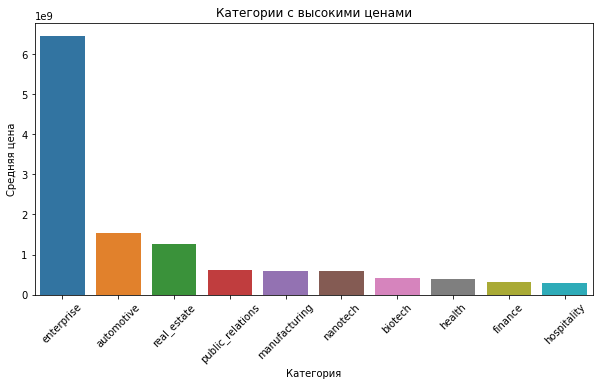

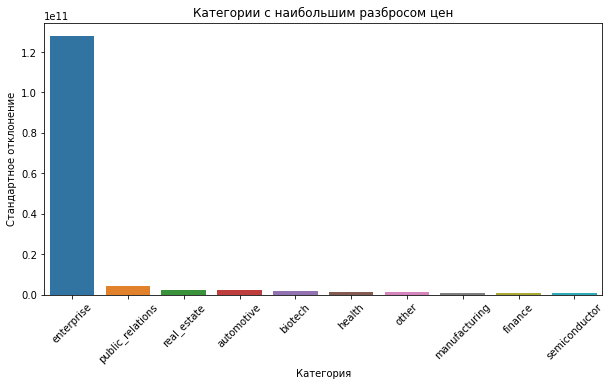

In [72]:
 #График для категорий с высокими ценами
plt.figure(figsize=(10, 5))
sns.barplot(x=high_price_categories.index, y=high_price_categories[('price_amount', 'mean')])
plt.title('Категории с высокими ценами')
plt.xlabel('Категория')
plt.ylabel('Средняя цена')
plt.xticks(rotation=45)
plt.show()

# График для категорий с наибольшим разбросом цен
plt.figure(figsize=(10, 5))
sns.barplot(x=high_variance_categories.index, y=high_variance_categories[('price_amount', 'std')])
plt.title('Категории с наибольшим разбросом цен')
plt.xlabel('Категория')
plt.ylabel('Стандартное отклонение')
plt.xticks(rotation=45)
plt.show()

Среди топа разброса цен и категорий по средней цене лидирует enterprise. Между этой категорией и остальными наблюдается большой разрыв. Это может быть связано со спецификой продукта. Enterprise-решения требуют более сложных технических решений, соответственно и более высоких затрат на разработку и поддержку.


### 3.5. Сколько раундов продержится стартап перед покупкой

- Необходимо проанализировать столбец `funding_rounds`. Исследовать значения столбца. Заказчика интересует типичное значение количества раундов для каждого возможного статуса стартапа.
- Построить график, который отображает, сколько в среднем раундов финансирования проходило для стартапов из каждой группы. Сделайть выводы.

In [73]:
# Группировка данных по статусу и расчёт среднего количества раундов
status_rounds = filtered_df.groupby('status')['funding_rounds'].agg(['mean', 'median'])
print(status_rounds)
 


               mean  median
status                     
acquired   0.523526     0.0
closed     1.381453     1.0
ipo        1.934375     1.0
operating  1.522658     1.0


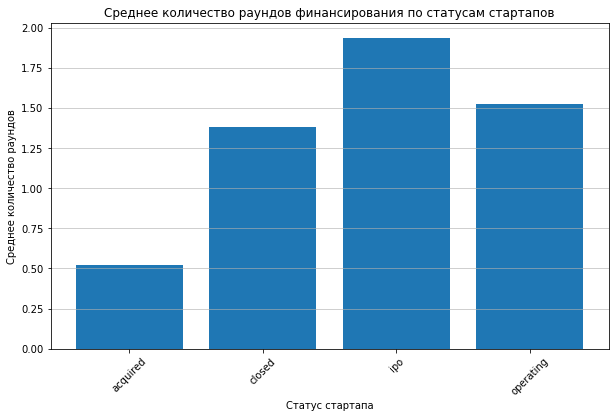

In [74]:
# Группировка данных по статусу и расчёт среднего количества раундов
status_rounds = filtered_df.groupby('status')['funding_rounds'].mean().reset_index()

# Построение графика
plt.figure(figsize=(10, 6))
plt.bar(status_rounds['status'], status_rounds['funding_rounds'])
plt.title('Среднее количество раундов финансирования по статусам стартапов')
plt.xlabel('Статус стартапа')
plt.ylabel('Среднее количество раундов')
plt.grid(axis='y', alpha=0.75)
plt.xticks(rotation=45)  # Поворот меток по оси X для лучшего читаемости
plt.show()

график показывает, что  статус ipo  имеtn наибольшее количество раундов финансирования в среднем. Это может указывать на более высокий интерес инвесторов к ipo. 


## Шаг 4. Итоговый вывод и рекомендации


В проекте проведён анализ данных о стартапах, включая обработку информации о раундах финансирования и образовании сотрудников. Выявлены тенденции в размерах и количестве раундов финансирования в зависимости от статуса стартапа. Определено, что полнота информации об образовании сотрудников и размер компании влияют на успех. Для основателей стартапов рекомендуется активно привлекать инвестиции, учитывая отраслевые тенденции, и уделять внимание квалификации команды. Это повысит шансы на успешное развитие бизнеса и привлечение инвестиций.